In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from learn_d_z import learn_d_z

In [2]:
calendrier_challenge = pd.read_parquet("challenge_data/calendrier_challenge.parquet")
questionnaire = pd.read_parquet("challenge_data/questionnaire.parquet")
consos_challenge = pd.read_parquet("challenge_data/consos_challenge.parquet")
temperatures = pd.read_parquet("challenge_data/temperatures.parquet")

In [3]:
min_date = datetime.datetime(2009,7,15)
max_date = datetime.datetime(2011,1,1)
all_clients = list(set(consos_challenge["id_client"]))
day = datetime.datetime(2011,1,2)-datetime.datetime(2011,1,1)
print(len(all_clients))

615


In [16]:
def load_signal(id_client,min_time,max_time):

    return consos_challenge[consos_challenge["id_client"]==id_client][consos_challenge["horodate"]>=min_time][consos_challenge["horodate"]<max_time]["puissance_W"]

In [17]:
signal = np.array(load_signal(all_clients[20],min_date,min_date+450*day))
print(len(signal),450*48)
n_times = len(signal)

21600 21600


C:\Users\paulc\AppData\Local\Temp/ipykernel_31924/2943520409.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return consos_challenge[consos_challenge["id_client"]==id_client][consos_challenge["horodate"]>=min_time][consos_challenge["horodate"]<max_time]["puissance_W"]


## Pénalisation journalière

450.0
(215530,)


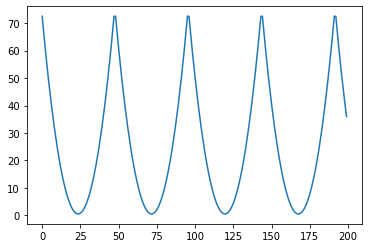

In [20]:
n_atoms = 15
length_atoms = 48
coef_reg = 0.5
reg = np.ones(n_times-length_atoms+1)
t_j = np.linspace(-12,12,48)
x_j = 1+t_j**2
for i in range(n_times//48-1):
    reg[48*i:48*(i+1)]=x_j
reg = reg*coef_reg
print(np.concatenate([reg for i in range(10)]).shape)
plt.plot(reg[0:200])

In [13]:
X = signal.reshape(1,len(signal))
cdl = learn_d_z(X,n_atoms,48,reg=reg)

Coordinate descent loop 0 / 60 [n_jobs=1]
[seed None] Objective (z_hat) : 15232.47277101
Using method dual for projection
[seed None] Objective (d) 9454.04565131
Coordinate descent loop 1 / 60 [n_jobs=1]
[seed None] Objective (z_hat) : 9144.84210059
Using method dual for projection
[seed None] Objective (d) 9061.82272146
Coordinate descent loop 2 / 60 [n_jobs=1]
[seed None] Objective (z_hat) : 8781.84410553
Using method dual for projection
[seed None] Objective (d) 8775.89028317
Coordinate descent loop 3 / 60 [n_jobs=1]
[seed None] Objective (z_hat) : 8545.66132037
Using method dual for projection
[seed None] Objective (d) 8542.20723653
Coordinate descent loop 4 / 60 [n_jobs=1]
[seed None] Objective (z_hat) : 8355.69390066
Using method dual for projection
[seed None] Objective (d) 8352.12011447
Coordinate descent loop 5 / 60 [n_jobs=1]
[seed None] Objective (z_hat) : 8198.93463033
Using method dual for projection
[seed None] Objective (d) 8195.15941169
Coordinate descent loop 6 / 60 [n

## Activation

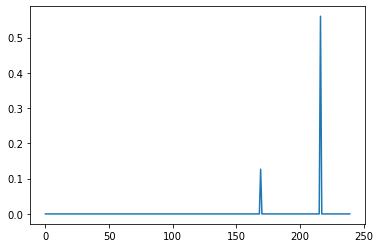

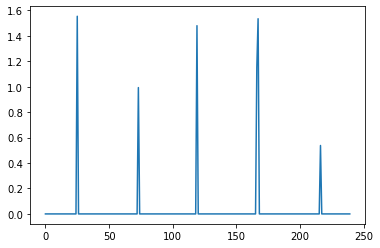

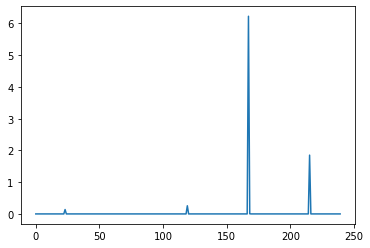

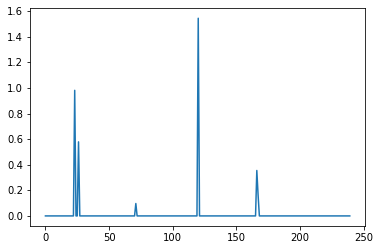

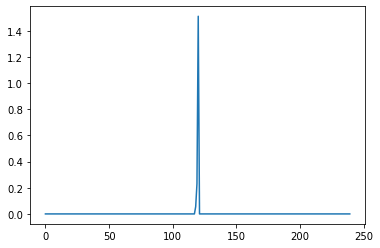

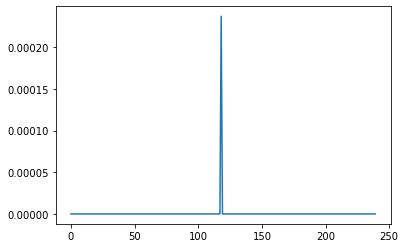

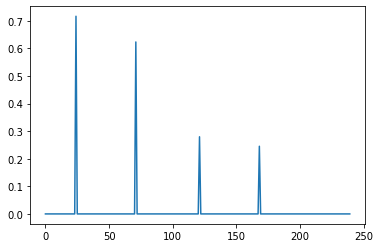

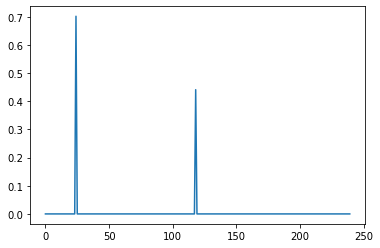

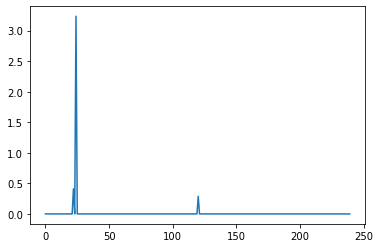

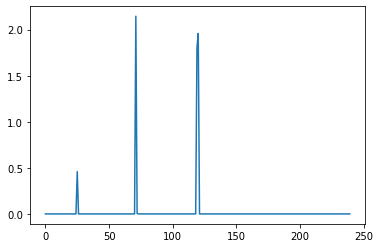

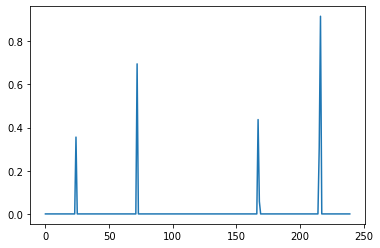

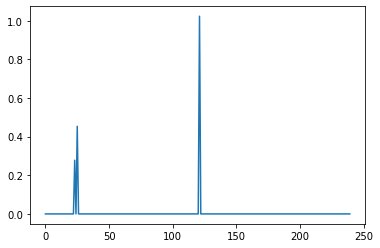

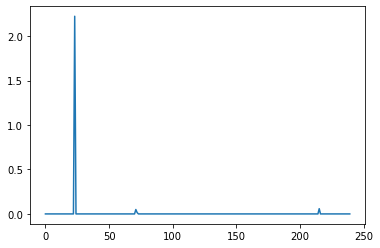

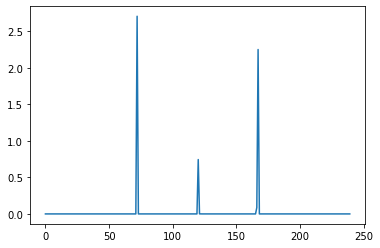

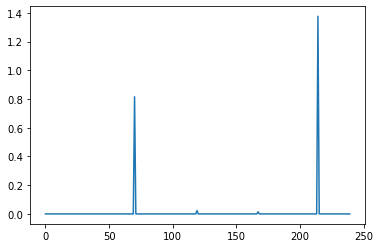

In [14]:
for i in range(n_atoms):
    plt.plot(cdl[3][i][0][48*5:48*10])
    plt.show()

C:\Users\paulc\AppData\Local\Temp/ipykernel_31924/2943520409.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return consos_challenge[consos_challenge["id_client"]==id_client][consos_challenge["horodate"]>=min_time][consos_challenge["horodate"]<max_time]["puissance_W"]


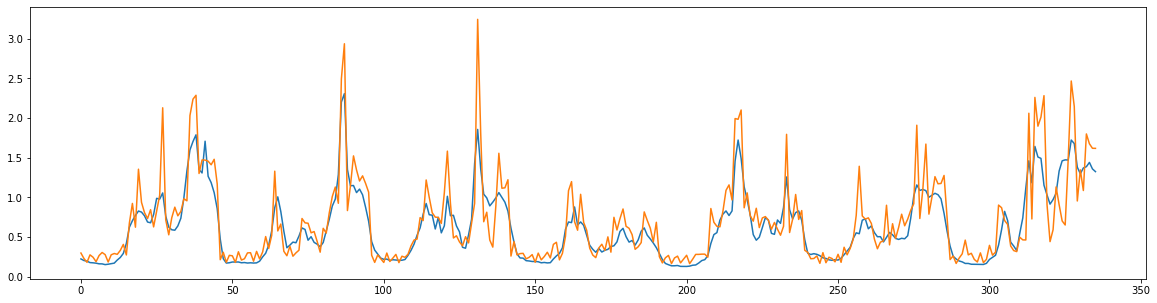

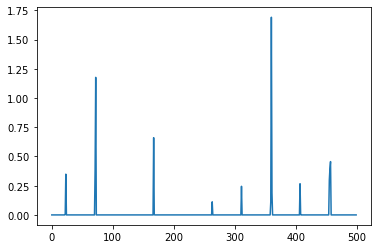

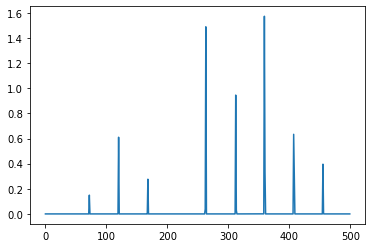

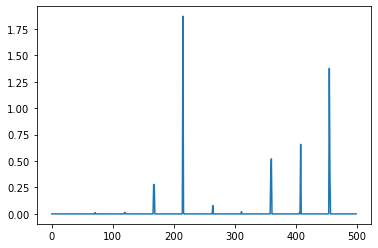

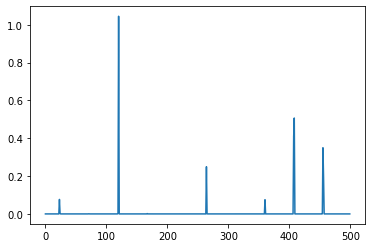

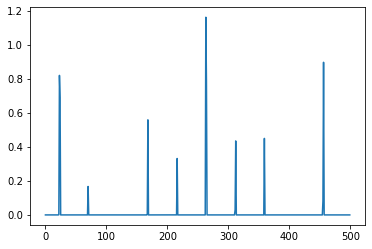

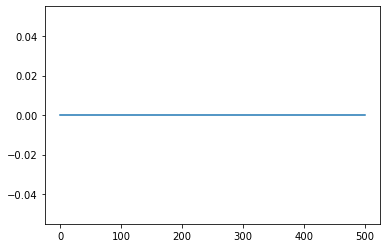

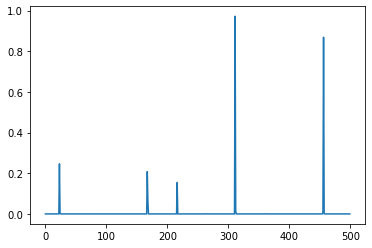

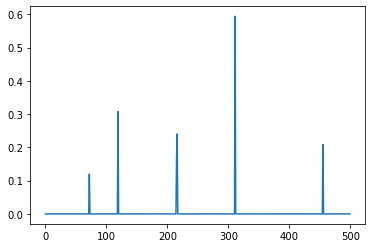

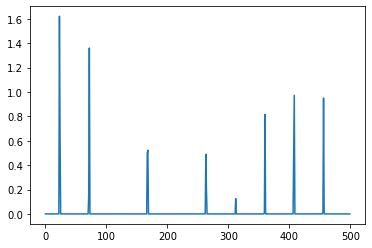

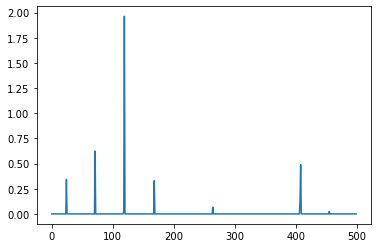

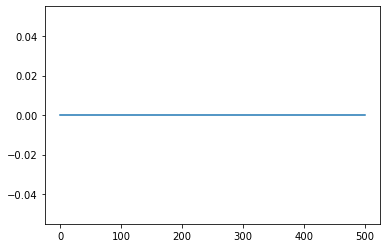

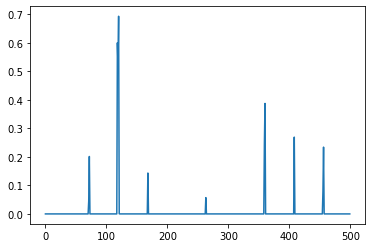

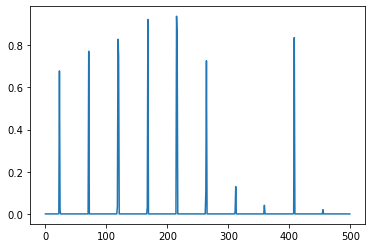

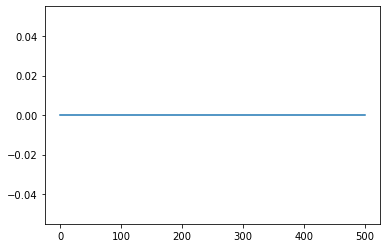

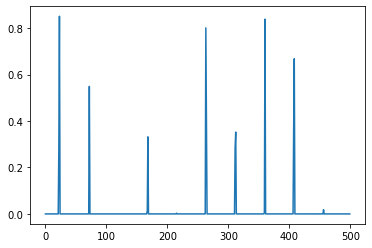

In [33]:
spike = np.load('data_spike/4100.npy')
atoms = np.load('data_atoms/4100.npy')
plt.figure(figsize=(20,5))

res = np.sum([np.convolve(atoms[i],spike[i][0]) for i in range(n_atoms)],axis=0)[start_plot:end_plot]
plt.plot(res)
signal = np.array(load_signal(4100,min_date,min_date+450*day))
plt.plot(signal[start_plot:end_plot])
plt.show()
for i in range(15):
    plt.plot(spike[i][0][0:500])
    plt.show()

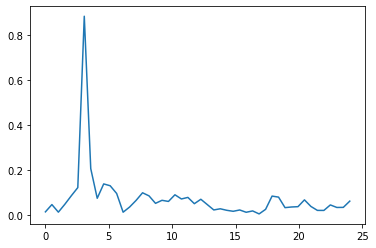

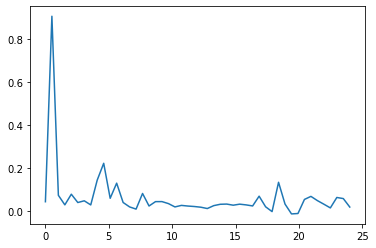

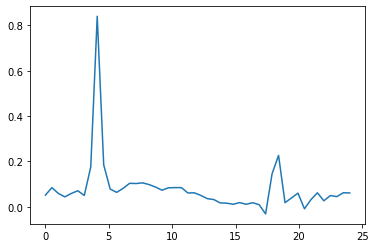

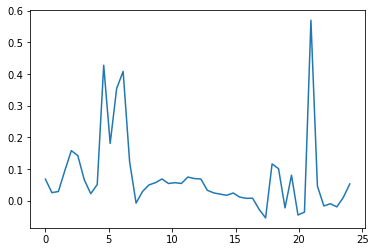

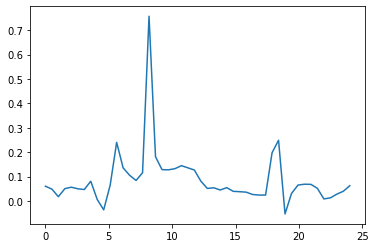

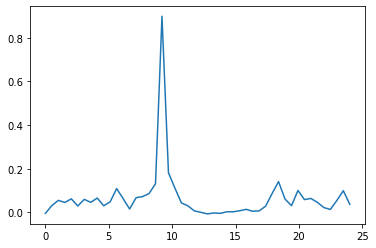

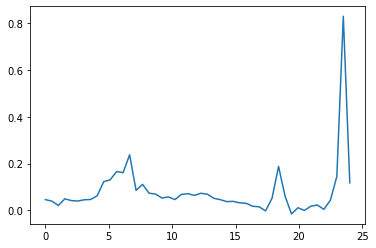

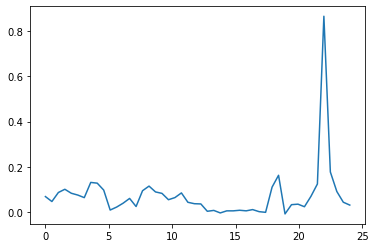

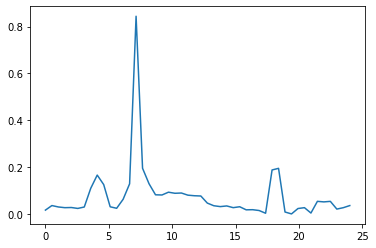

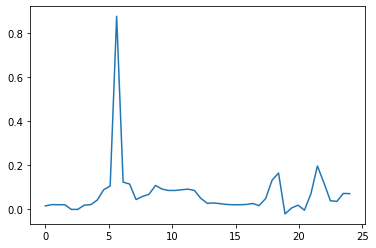

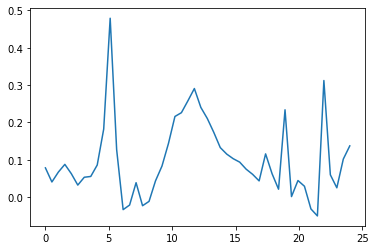

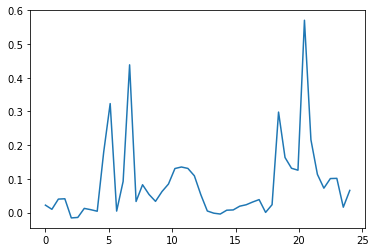

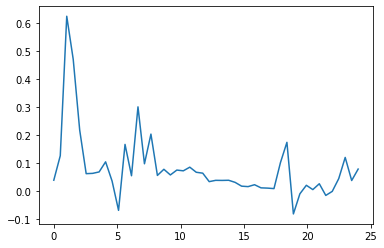

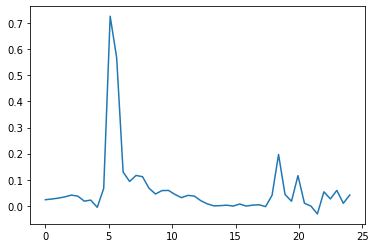

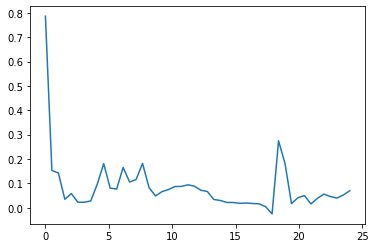

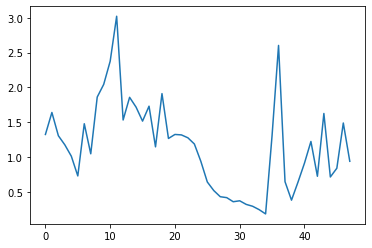

In [15]:
sums = np.zeros(48)
for i in range(n_atoms):
    plt.plot(np.linspace(0,24,48),cdl[2][i])
    plt.show()
    sums = sums + cdl[2][i]
plt.plot(sums)

[0, 2, 1, 1, 0, 1, 0, 5, 2, 1, 2, 0, 0, 2, 5]


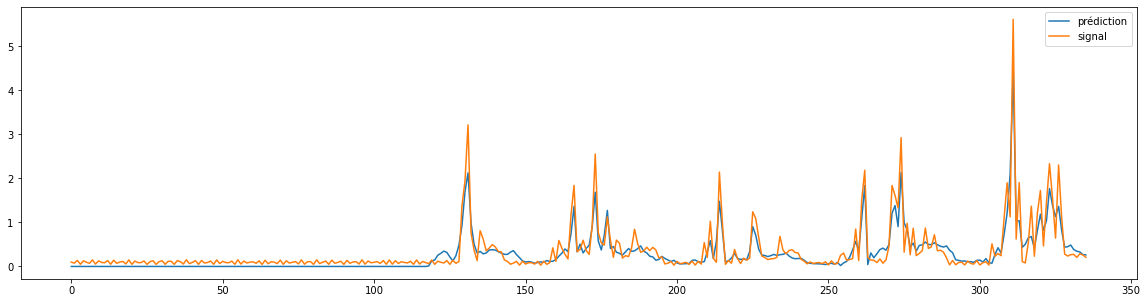

In [10]:
start_plot = 48*40
end_plot = 48*47
plt.figure(figsize=(20,5))
print([np.sum(cdl[3][i][0][start_plot:end_plot]>0.5) for i in range(n_atoms)])
res = np.sum([np.convolve(cdl[2][i],cdl[3][i][0]) for i in range(n_atoms)],axis=0)[start_plot:end_plot]
# for i in range(n_atoms):
#     if np.sum(cdl[3][i][0][start_plot-48:end_plot])>0.5:
#         plt.plot(np.linspace(0,24,48),np.convolve(cdl[2][i],cdl[3][i][0])[start_plot:end_plot])
plt.plot(res,label = 'prédiction')
plt.plot(signal[start_plot:end_plot],label = 'signal')
plt.legend()